In [ ]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil,matplotlib as mpl, matplotlib.pyplot as plt

# Get data

In [ ]:
BASE_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"

TRAINING_IMAGES = "train-images-idx3-ubyte.gz"
TRAINING_LABELS = "train-labels-idx1-ubyte.gz"
TEST_IMAGES = "t10k-images-idx3-ubyte.gz"
TEST_LABELS = "t10k-labels-idx1-ubyte.gz"

In [ ]:
PATH_DATA = Path("data")
PATH_DATA.mkdir(exist_ok=True)


training_images_path = PATH_DATA/TRAINING_IMAGES
training_labels_path = PATH_DATA/TRAINING_LABELS
test_images_path = PATH_DATA/TEST_IMAGES
test_labels_path = PATH_DATA/TEST_LABELS

In [ ]:
from urllib.request import urlretrieve

In [ ]:
if not training_images_path.exists():
  urlretrieve(BASE_URL+TRAINING_IMAGES, training_images_path)
if not training_labels_path.exists():
  urlretrieve(BASE_URL+TRAINING_LABELS, training_labels_path)
if not test_images_path.exists():
  urlretrieve(BASE_URL+TEST_IMAGES, test_images_path)
if not test_labels_path.exists():
  urlretrieve(BASE_URL+TEST_LABELS, test_labels_path)

In [ ]:
!ls -l data

total 30164
-rw-r--r-- 1 root root  4422102 Oct 28 18:37 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root     5148 Oct 28 18:37 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 26421880 Oct 28 18:37 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    29515 Oct 28 18:37 train-labels-idx1-ubyte.gz


In [ ]:
import struct
import array
def parse_idx(path):
  with gzip.open(path, 'rb') as f:
    header = f.read(4)
    
    zeros, data_type, num_dimensions = struct.unpack('>HBB', header)
    dimension_sizes = struct.unpack('>' + 'I' * num_dimensions, f.read(4 * num_dimensions))
    

    data = array.array('B', f.read())
    data.byteswap()  # looks like array.array reads data as little endian

  return list(data)

def chunks(x, size):
    for i in range(0, len(x), size): 
        yield x[i:i + size]

In [ ]:
x_train = list(chunks(parse_idx(training_images_path),784))
y_train = parse_idx(training_labels_path)

x_test = list(chunks(parse_idx(test_images_path),784))
y_test = parse_idx(test_labels_path)

print((len(x_train), len(x_train[0])))
print(len(y_train))

print((len(x_test), len(x_test[0])))
print(len(y_test))

(60000, 784)
60000
(10000, 784)
10000


In [ ]:
print((len(x_train), len(x_train[0])))
print(len(y_train))

print((len(x_test), len(x_test[0])))
print(len(y_test))

(60000, 784)
60000
(10000, 784)
10000


In [ ]:
index_to_label = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

list(map(lambda x: index_to_label[x], y_train[0:10]))

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

In [ ]:
x_train[0][200:210]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 69]

# Displaying the images

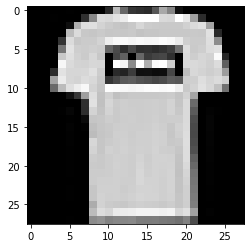

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(x_train[1],28)))

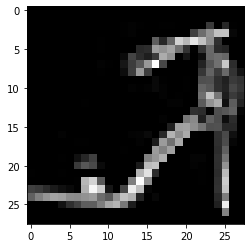

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(x_train[8],28)))

In [ ]:
class Matrix:
  def __init__(self, xs):
    self.xs = xs
  def __getitem__(self, idx):
    return self.xs[idx[0]][idx[1]]

In [ ]:
img = list(chunks(x_train[1],28))

In [ ]:
m = Matrix(img)

In [ ]:
m[10,9]

198

In [ ]:
import torch 
from torch import tensor 

In [ ]:
tns = tensor(img)

In [ ]:
tns[10,9]

tensor(198)

In [ ]:
x_train, y_train, x_test, y_test = map(tensor, (x_train, y_train, x_test, y_test))

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

torch.Size([60000, 784])
torch.Size([60000])
torch.Size([10000, 784])
torch.Size([10000])


In [ ]:
x_train.type

<function Tensor.type>

In [ ]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([60000, 28, 28])

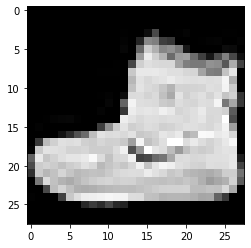

In [ ]:
plt.imshow(imgs[0])